# Machine Learning Master Notes 18 - Logistic Regression on Multi-Class Classification

### Prepare Environment

In [1]:
%matplotlib inline


# Essential libraries
import numpy as np
import pandas as pd
import math
import scipy
import random
import datetime
from datetime import datetime

# Graphical Component
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import cm


## SciKit Learning Preprocessing  
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# Pipeline and Train Test Split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

## SciKit Learn ML Models
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Multiclass
from sklearn import multiclass
from sklearn.multiclass import OneVsRestClassifier

## SciKit Learn Dataset
import sklearn.datasets as skdata
from sklearn.datasets import make_blobs, make_classification, make_circles, make_gaussian_quantiles

## Pytorch
import torch

## Tensorflow
import tensorflow as tf

# The following file contain the finalized gradient descent, cost function program 
import MyRegressionProgramV2 as my
import testFile as test


2024-10-30 14:17:20.540825: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Multiple Classification in Logistic Regression

Besides binary classification, Logistic Regression also supported multi-class classification problem. There are two techniques that are used in multi-class classification. They are:

1. **One-vs-Rest/One-vs-All (OvR/OvA)**
2. **Multinomial Logistic Regression (a.k.a Softmax Regression)**

### One-vs-Rest (OvR/OvA)

- Let us take an example of classifying 3 classes of cat, dog and rabbit. One-vs-all techniques will train the Logistic Regression 3 times.
- For the first time, Logistic Regression will train the classification of 2 classes, it will train on the class of **cat** against the **other 2 classes combined**. It will compute the probability of the data is **cat** against the rest. 
- Using similar way, the model will run classification of the other 2 classes against the rest of the classes combined.
- In essence, the model uses binary classification technique and it trains one class at a time. 
- For new query, the query will be use to compute with the trained weights and the prediction will be the class with the highest probability. This can also be expressed as $\hat y = arg max_{k}P(y=k|x)$
$$$$
**Advantages**
- This method is simple and easy to understand.
- We can train different class in parallel.
- This method can be used for large dataset
$$$$
**Disadvantage**
- This model can create inconsistent decision boundaries across different class.
- The probability predicted may not be comparable

### Softmax Regression

Softmax Regression, also known as Multinomial Logistic Regression, is a different technique in multi-class classification. Softmax directly models the probability distribution over multiple classes using the Softmax function.

The formula for Softmax Function is as follows:
$$P(y=k|x)=\frac{e^{z_i}}{\sum\limits_{j=1}^{k}e^{z_j}}$$
Since:
$$z = f(x)$$
Then:
$$P(y=k|x)=\frac{e^{f(x)_i}}{\sum\limits_{j=1}^{k}e^{f(x)_j}}$$
$$P(y=k|x)=\frac{e^{Xw_k+b_k}}{\sum\limits_{j=1}^{k}e^{Xw_j+b_j}}$$


**Advantages:**
- Using a single model, it produce better weights that are consistent
- Using same model will also result in consistent decision boundaries.
$$$$

**Disadvantages:**
- Computationally more intensive compared to OvR
- The implementation is more complex.

**Reference:**

- https://towardsdatascience.com/multiclass-classification-with-softmax-regression-explained-ea320518ea5d
- https://towardsdatascience.com/multiclass-logistic-regression-from-scratch-9cc0007da372

## Labeling Multi-Class Classification 

There are 2 ways to label the truth or the actual outcome in `y_train`. The first method is to use class index and the second method is to use one-hot encoding. Please note that multi-class classification can also be found in X-features. For now we focus on labeling `y_train`.

Let us take the following 5 data example with 3 class and two features:

**X features:**

|x0|x1|
|---|---|
|1|3|
|8|9|
|5|4|
|2|4|
|9|8|

There are 3 classes named class 0, class 1 and class 2. Using class index labeling we can label the class as follows:

**Class Index Labeling**

|x0|x1|y-truth|
|---|---|---|
|1|3|0|
|8|9|1|
|5|4|2|
|2|4|0|
|9|8|1|

**One-Hot Encoding**

In One-Hot Encoding method, `y-train` has 3 columns instead of one column. Take the first example of $x_0 = 1, x_1 = 3$, we will have 3 columns for `y-train` where each column represent each class. So `y-train` will have the columns `class 0`, `class 1` and `class 2`. Since the first example belongs to `class 0`, then we will have a $1$ in the column `class 0` and the rest of the columns will be 0. Thus

|x0|x1|y-truth class 0| y-truth class 1| y-truth class 2|
|---|---|---|---|---|
|1|3|1|0|0|

Therefore the whole classification will be as follows:


|x0|x1|class 0|class 1|class 2|
|:---:|:---:|:---:|:---:|:---:|
|1|3|1|0|0|
|8|9|0|1|0|
|5|4|0|0|1|
|2|4|1|0|0|
|9|8|0|1|0|

The `y_train` should contain just like  the table below:

|class 0|class 1|class 2|
|:---:|:---:|:---:|
|1|0|0|
|0|1|0|
|0|0|1|
|1|0|0|
|0|1|0|

### When should we use Class Index or One-Hot encoding?

Please note that categorical labeling can be applied to the training features or in this case applied in the y truth label.

#### Labeling y Truth

**Advantages of One-Hot Encoding**

- One-hot encoding works well with Softmax function. As Softmax function computes the probability distribution across different class, this works well with one-hot encoding as no special conversion is required.
- One-hot encoding is suitable for some models, loss function or framework that is designed and works well with this type of labeling.
- One-hot encoding is suitable for multi-label classification.

**Disadvantages of One-Hot Encoding**

- This method takes up more memory and may result in many columns if there are many classes
- It is also computationally more expensive


**Advantages of Class Index**

- Memory efficient
- Simpler to implement
- Some models or loss function works well with class index.

**Disadvantages of Class Index**

- Not suitable for multi-label classification



**Recommendation**

- The choice of using one-hot encoding or class index largely depends on the loss function and the model we choose. If our model or loss function works well with one type of encoding, then we can choose the type of labeling
- It also depends on the expected output we need. If we need one-hot encoding as our output then we should choose the specific labeling.
- Multi-label classification only works with one-hot encoding.
- More often we had a column with text description, in such case, we need to consider how many classes are there. If we have too many classes, we might want to consider using class index. For simple classification, one-hot encoding is good enough.
- Use class index for simplicity, especially when there are many classes.
- Use class index if our data is very large and we want to save memory. 

#### Labeling Categorical Features

**The decision of using class index or one-hot encoding is more important if we need to process categorical data in the X features. Using one-hot encoding will increase the number of columns if there are many classes. However, there are advantages and disadvantages when using both methods.**

- Based on the reference below, using class index might affect the training as the system might consider class 2 better than class 1 due to its order. If we need to preserve the order of classification, then class index might be useful and it uses one column instead of multiple columns.
- If ordinal relationship (the order of classification) is not important or each classes do not have any order relationship between the classes, then one-hot encoding is better. In fact some practitioner prefer one-hot encoding to prevent ordinal relationship issue.

Example:
The following are example of classification that have no ordinal relationship.

- classification of apple, orange
- classification of cars, planes

The following are example of classification that have ordinal relationship.

- Rating systems (1- strongly disagree to 5-strongly agree ratings).
- Risk system (low, medium and high risk)

**Reference**

- https://medium.com/geekculture/machine-learning-one-hot-encoding-vs-integer-encoding-f180eb831cf1
- https://medium.com/@kevin.menear/comparing-label-encoding-one-hot-encoding-and-binary-encoding-for-handling-categorical-variables-933544ccbd02
- https://chatgpt.com/share/6709e91f-5690-8000-afa4-60450a5e6615

## Implementing Class Index and One-Hot Encoding

### Converting Data to Class Index using SciKit Learn

Consider the following data

|x0|x1|y-truth|
|---|---|---|
|1|3|Cat A|
|8|9|Cat B|
|5|4|Cat C|
|2|4|Cat A|
|9|8|Cat B|

In [2]:
X = np.array([[1, 3], [8, 9], [5,4], [2,4], [9,8]])
y = np.array(['Cat A', 'Cat B', 'Cat C', 'Cat A', 'Cat B'])

In [3]:
convert_order = preprocessing.LabelEncoder()
y_convert_index = convert_order.fit_transform(y)
y_convert_index

array([0, 1, 2, 0, 1])

In [4]:
convert_order.classes_

array(['Cat A', 'Cat B', 'Cat C'], dtype='<U5')

In [5]:
convert_order2 = preprocessing.OrdinalEncoder()
y_convert_index2 = convert_order2.fit_transform(y.reshape(-1,1))
y_convert_index2

array([[0.],
       [1.],
       [2.],
       [0.],
       [1.]])

In [6]:
convert_order2.categories_

[array(['Cat A', 'Cat B', 'Cat C'], dtype='<U5')]

In [7]:
# Partial Representation
Xa = np.array([[1, 3], [8, 9]])
ya = np.array(['Cat A', 'Cat B'])

In [8]:
convert_order = preprocessing.LabelEncoder()
ya_convert_index = convert_order.fit_transform(ya)
ya_convert_index

array([0, 1])

<div class="alert alert-block alert-warning">

**Important**:
`preprocessing.LabelEncoder()` and `preprocessing.OrdinalEncoder()` only work when all the class are represented in `y_train`.

</div>

**What is the Difference between OrdinalEncoder and LabelEncoder**

The key difference is that ordinal encoder consider the order of the class whereas label encoder does not take the order into consideration.

**Reference**
- https://www.geeksforgeeks.org/what-is-the-difference-between-ordinalencoder-and-labelencoder/

### Converting Data to Class Index using Pandas

In [9]:
X = np.array([[1, 3], [8, 9], [5,4], [2,4], [9,8]])
y = np.array(['Cat A', 'Cat B', 'Cat C', 'Cat A', 'Cat B'])

In [10]:
xdf = pd.DataFrame(X, columns=['x0','x1'])
ydf = pd.DataFrame(y, columns=['y'])                  

In [11]:
ydf 

,y
0,Cat A
1,Cat B
2,Cat C
3,Cat A
4,Cat B


In [12]:
ydf = pd.Categorical(ydf.y)
ydf

['Cat A', 'Cat B', 'Cat C', 'Cat A', 'Cat B']
Categories (3, object): ['Cat A', 'Cat B', 'Cat C']

In [13]:
ydf.codes

array([0, 1, 2, 0, 1], dtype=int8)

In [14]:
# Partial Representation
Xa = np.array([[1, 3], [8, 9]])
ya = np.array(['Cat A', 'Cat B'])

In [15]:
yadf = pd.DataFrame(ya, columns=['ya'])     

In [16]:
yadf = pd.Categorical(yadf.ya)
yadf

['Cat A', 'Cat B']
Categories (2, object): ['Cat A', 'Cat B']

In [17]:
yadf.codes

array([0, 1], dtype=int8)

<div class="alert alert-block alert-warning">

**Important**:
`pd.Categorical()` only work when all the class are represented in `y_train`.

</div>

### Converting Data to One-Hot Encoding SciKit Learn

In [18]:
X = np.array([[1, 3], [8, 9], [5,4], [2,4], [9,8]])
y = np.array(['Cat A', 'Cat B', 'Cat C', 'Cat A', 'Cat B']).reshape(-1,1)

In [19]:
one_hot_convert = preprocessing.OneHotEncoder()
y_convert_one_hot = one_hot_convert.fit_transform(y).toarray()
y_convert_one_hot

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [20]:
one_hot_convert.categories_

[array(['Cat A', 'Cat B', 'Cat C'], dtype='<U5')]

In [21]:
# Partial Representation
Xa = np.array([[1, 3], [8, 9]])
ya = np.array(['Cat A', 'Cat B']).reshape(-1,1)

In [22]:
one_hot_convert = preprocessing.OneHotEncoder()
ya_convert_one_hot = one_hot_convert.fit_transform(ya).toarray()
ya_convert_one_hot

array([[1., 0.],
       [0., 1.]])

<div class="alert alert-block alert-warning">

**Important**:
`preprocessing.OneHotEncoder()` only work when all the class are represented in `y_train`.

</div>

### Converting Data to One-Hot Encoding Pandas

In [23]:
xdf = pd.DataFrame(X, columns=['x0','x1'])
ydf = pd.DataFrame(y, columns=['y'])    

In [24]:
xdf

,x0,x1
0,1,3
1,8,9
2,5,4
3,2,4
4,9,8


In [25]:
ydf

,y
0,Cat A
1,Cat B
2,Cat C
3,Cat A
4,Cat B


In [26]:
y = pd.get_dummies(ydf)
y

,y_Cat A,y_Cat B,y_Cat C
0,True,False,False
1,False,True,False
2,False,False,True
3,True,False,False
4,False,True,False


In [27]:
# Partial Representation
Xa = np.array([[1, 3], [8, 9]])
ya = np.array(['Cat A', 'Cat B']).reshape(-1,1)

In [28]:
Xadf = pd.DataFrame(Xa, columns=['x0','x1'])
yadf = pd.DataFrame(ya, columns=['y'])    

In [29]:
ya = pd.get_dummies(yadf)
ya

,y_Cat A,y_Cat B
0,True,False
1,False,True


<div class="alert alert-block alert-warning">

**Important**:
`pd.get_dummies()` only work when all the class are represented in `y_train`.

</div>

### Converting Data to One-Hot Encoding from Class Index Alternative

The following methods do not need to have all class represented:

In [30]:
X = np.array([[1, 3], [8, 9], [5,4], [2,4], [9,8]])
y = np.array(['Cat A', 'Cat B', 'Cat C', 'Cat A', 'Cat B'])

In [31]:
convert_order = preprocessing.LabelEncoder()
y_convert_index = convert_order.fit_transform(y)
y_convert_index

array([0, 1, 2, 0, 1])

In [32]:
number_of_class = len(np.unique(y_convert_index))
number_of_class

3

In [33]:
y_oh = np.identity(number_of_class)[y_convert_index]
y_oh

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [34]:
# Partial Representation
Xa = np.array([[1, 3], [8, 9]])
ya = np.array(['Cat A', 'Cat B'])

In [35]:
convert_order = preprocessing.LabelEncoder()
ya_convert_index = convert_order.fit_transform(ya)
ya_convert_index

array([0, 1])

In [36]:
# We need to hard code the number of class since all class information are not represented
number_of_class = 3 # hard code

In [37]:
ya_oh = np.identity(number_of_class)[ya_convert_index]
ya_oh

array([[1., 0., 0.],
       [0., 1., 0.]])

In [38]:
ya_oh1 = np.eye(number_of_class)[ya_convert_index]
ya_oh1

array([[1., 0., 0.],
       [0., 1., 0.]])

- **`np.identity` is the same as `np.eye`**
- **The above method is useful when we know that there are how many classification, but we do not have the representing data with us. However, we cannot have more than one missing classes.**

### Converting Data from One-Hot Encoding to Class Index

If we have one-hot encoded data, we can convert them back to class index as follows:

In [39]:
yb = np.array([[1,0,0],[0,1,0],[0,0,1],[1,0,0],[0,0,1],[0,1,0]])
yb

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]])

In [40]:
np.argmax(yb, axis=1)

array([0, 1, 2, 0, 2, 1])

## Preparation of Simple Multi-Class Classification Data

### Example 1: 3 Class Custom Data

In [41]:
X1 = np.array([[1, 3], [2,4], [8, 9], [3,4],[7, 8.5], [6.8, 7.5], [2,5],[1.5, 2.5],[6,3],[7,4],[6,5], [6,8], [8,3],[5,4],[9,8]])
y1 = np.array([0, 0, 1, 0, 1, 1, 0, 0, 2, 2, 2, 1, 2, 2, 1])

In [42]:
X1_c0 = X1[y1 == 0]
X1_c1 = X1[y1 == 1]
X1_c2 = X1[y1 == 2]

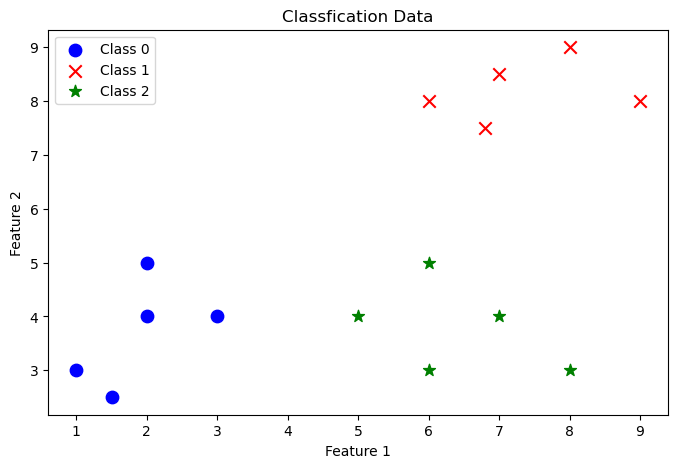

In [43]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X1_c0[:,0], X1_c0[:,1], marker='o', s = 80, c='b', label="Class 0")
ax1.scatter(X1_c1[:,0], X1_c1[:,1], marker='x', s = 80, c='r', label="Class 1")
ax1.scatter(X1_c2[:,0], X1_c2[:,1], marker='*', s = 80, c='g', label="Class 2")
ax1.set_title('Classfication Data')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.legend(loc="upper left")
plt.show()

### Example 2: 3 Class Basic Example

In [44]:
X2, y2 = make_classification(n_samples=30, n_features = 2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=3, 
                             n_clusters_per_class = 1, random_state=15)

In [45]:
X2

array([[ 0.27912991, -1.44037331],
       [ 1.09078803,  2.87039611],
       [-0.1421124 , -1.92345206],
       [ 0.52621628,  0.19413389],
       [ 1.23776235, -0.80607812],
       [ 0.92997061,  2.2107433 ],
       [ 0.92163467, -0.99339502],
       [-1.25848203,  2.69425705],
       [-1.16747321,  1.02481538],
       [ 0.34863806,  0.15637629],
       [-0.91380625,  0.89020462],
       [-1.02732663,  1.31426767],
       [-0.79246704,  0.71060574],
       [ 1.23144309,  2.18451769],
       [-1.34277644,  2.39459039],
       [-0.89802635,  1.12900034],
       [ 1.60262439,  2.18545311],
       [-0.28457476, -2.03758725],
       [ 1.77926414, -0.46952691],
       [ 2.02633732,  2.02052107],
       [ 1.31489592, -0.27941799],
       [-1.14698508, -0.14463301],
       [ 1.13865231,  2.18013876],
       [ 0.56927256, -1.30431595],
       [ 1.35870645, -0.79851399],
       [ 1.45015611, -0.59655324],
       [-0.84034771,  0.09035531],
       [-0.17669223,  1.82078771],
       [-0.93615324,

In [46]:
y2

array([2, 1, 2, 1, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 2, 1, 1, 0,
       1, 2, 2, 2, 0, 1, 0, 2])

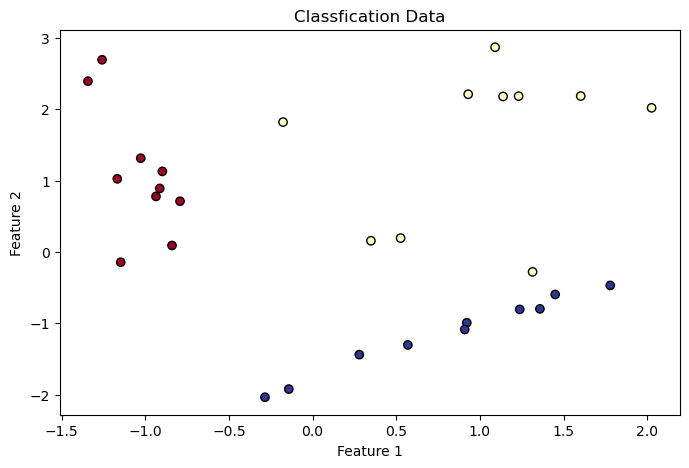

In [47]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X2[:, 0], X2[:, 1], c=y2, edgecolors='k', cmap=plt.cm.RdYlBu)
ax1.set_title('Classfication Data')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
plt.show()

### Example 3 : 4 Class

In [48]:
X3, y3 = make_classification(n_samples=50, n_features = 2, n_informative = 2, n_redundant=0, n_repeated=0, 
                             n_classes=4, n_clusters_per_class = 1, random_state=33)

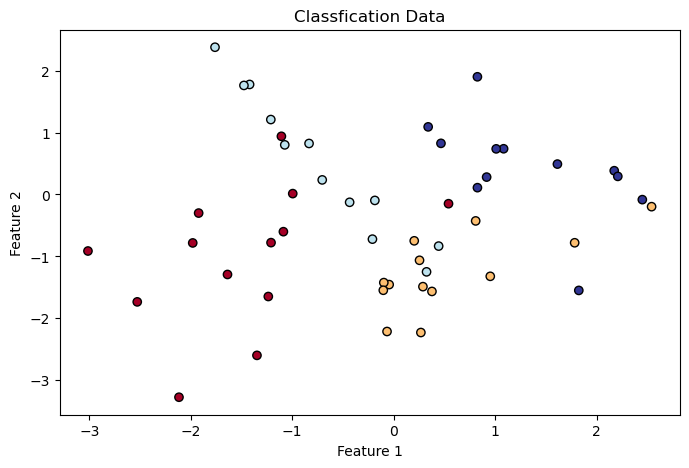

In [49]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X3[:, 0], X3[:, 1], c=y3, edgecolors='k', cmap=plt.cm.RdYlBu)
ax1.set_title('Classfication Data')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
plt.show()

## SciKit Learn Logistics Regression and Regularization

In SciKit Learn, `LogisticsRegression()` also supported multi-class classification. However, only some solver supported Softmax. Currently, `LogisticsRegression()` support OvR and multinomial by setting `multi_class`. However, this will be deprecated soon.

Going forward, use `sklearn.multiclass.OneVsRestClassifier(LogisticRegression())` instead for OvR. In `sklearn.multiclass.OneVsRestClassifier(LogisticRegression())` we can add our solver and penalty inside `LogisticsRegression()`. All solvers supports OvR.

`LogisticsRegression()` will be used for multinomial going forward.


|Solver|Supported Penalty|multinomial multiclass|ovr|
|---|---|---|---|
|‘lbfgs’|‘l2’, None|yes|yes|
|‘liblinear’|‘l1’, ‘l2’|no|yes|
|‘newton-cg’|‘l2’, None|yes|yes|
|‘newton-cholesky’|‘l2’, None|no|yes|
|‘sag’|‘l2’, None|yes|yes|
|‘saga’|‘elasticnet’, ‘l1’, ‘l2’, None|yes|yes|

Please note that only some solver support **softmax (multinomial)** but all solvers support **ovr**.

## SciKit Learn Multi-Class Logistic Regression

### Application of SciKit Learn for Example 1

#### Using `ovr` in Logistic Regression

In [50]:
#logisModel1 = LogisticRegression(penalty=None, solver='lbfgs', multi_class='ovr')
logisModel1 = OneVsRestClassifier(LogisticRegression(penalty=None, solver='lbfgs'))
logis1 = logisModel1.fit(X1, y1)

In [51]:
y_hat1 = logis1.predict(X1)
y_hat1

array([0, 0, 1, 0, 1, 1, 0, 0, 2, 2, 2, 1, 2, 2, 1])

In [52]:
logis1.score(X1,y1)

1.0

In [53]:
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.02)
x2grid = np.arange(y_min, y_max, 0.02)
xx, yy = np.meshgrid(x1grid,x2grid)
Z1 = logis1.predict(np.c_[xx.ravel(), yy.ravel()])
Z1 = Z1.reshape(xx.shape)

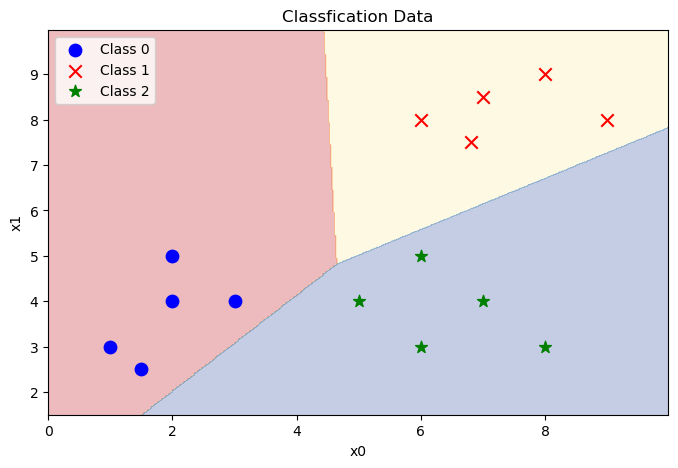

In [54]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z1, alpha=0.3, cmap=plt.cm.RdYlBu)
ax1.scatter(X1_c0[:,0], X1_c0[:,1], marker='o', s = 80, c='b', label="Class 0")
ax1.scatter(X1_c1[:,0], X1_c1[:,1], marker='x', s = 80, c='r', label="Class 1")
ax1.scatter(X1_c2[:,0], X1_c2[:,1], marker='*', s = 80, c='g', label="Class 2")
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
ax1.legend(loc="upper left")
plt.show()

#### Using `multinomial` in Logistic Regression

In [55]:
logisModel2 = LogisticRegression(penalty=None, solver='newton-cg', multi_class='multinomial')
logis2 = logisModel2.fit(X1, y1)

In [56]:
y_hat2 = logis1.predict(X1)
y_hat2

array([0, 0, 1, 0, 1, 1, 0, 0, 2, 2, 2, 1, 2, 2, 1])

In [57]:
logis2.score(X1,y1)

1.0

In [58]:
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.02)
x2grid = np.arange(y_min, y_max, 0.02)
xx, yy = np.meshgrid(x1grid,x2grid)
Z2 = logis2.predict(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)

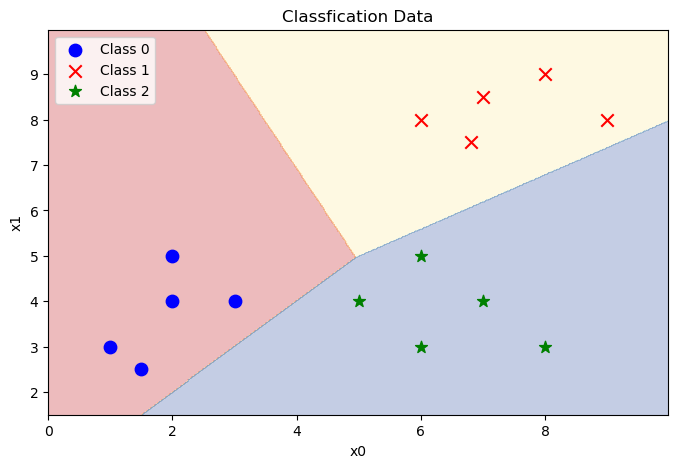

In [59]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z2, alpha=0.3, cmap=plt.cm.RdYlBu)
ax1.scatter(X1_c0[:,0], X1_c0[:,1], marker='o', s = 80, c='b', label="Class 0")
ax1.scatter(X1_c1[:,0], X1_c1[:,1], marker='x', s = 80, c='r', label="Class 1")
ax1.scatter(X1_c2[:,0], X1_c2[:,1], marker='*', s = 80, c='g', label="Class 2")
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
ax1.legend(loc="upper left")
plt.show()

#### Using `ovr` in `OneVsRestClassifier`

In [60]:
logisModel3 = OneVsRestClassifier(LogisticRegression(penalty=None, solver='saga', max_iter = 10000))
logis3 = logisModel3.fit(X1, y1)

In [61]:
logis3.score(X1,y1)

1.0

In [62]:
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.02)
x2grid = np.arange(y_min, y_max, 0.02)
xx, yy = np.meshgrid(x1grid,x2grid)
Z3 = logis3.predict(np.c_[xx.ravel(), yy.ravel()])
Z3 = Z3.reshape(xx.shape)

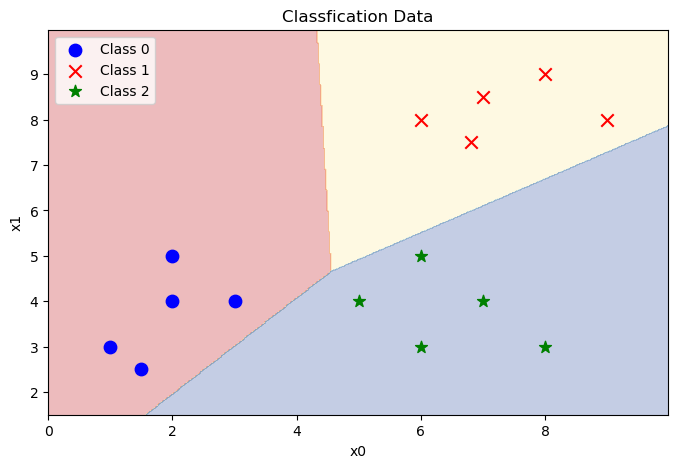

In [63]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z3, alpha=0.3, cmap=plt.cm.RdYlBu)
ax1.scatter(X1_c0[:,0], X1_c0[:,1], marker='o', s = 80, c='b', label="Class 0")
ax1.scatter(X1_c1[:,0], X1_c1[:,1], marker='x', s = 80, c='r', label="Class 1")
ax1.scatter(X1_c2[:,0], X1_c2[:,1], marker='*', s = 80, c='g', label="Class 2")
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
ax1.legend(loc="upper left")
plt.show()

### Application of SciKit Learn for Example 2

#### Using Multinomial Logistic Regression

In [64]:
logisModel4 = LogisticRegression(penalty=None, solver='sag', multi_class='multinomial', max_iter=100000)
logis4 = logisModel4.fit(X2, y2)

In [65]:
logis4.score(X2,y2)

1.0

In [66]:
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.02)
x2grid = np.arange(y_min, y_max, 0.02)
xx, yy = np.meshgrid(x1grid,x2grid)
Z4 = logis4.predict(np.c_[xx.ravel(), yy.ravel()])
Z4 = Z4.reshape(xx.shape)

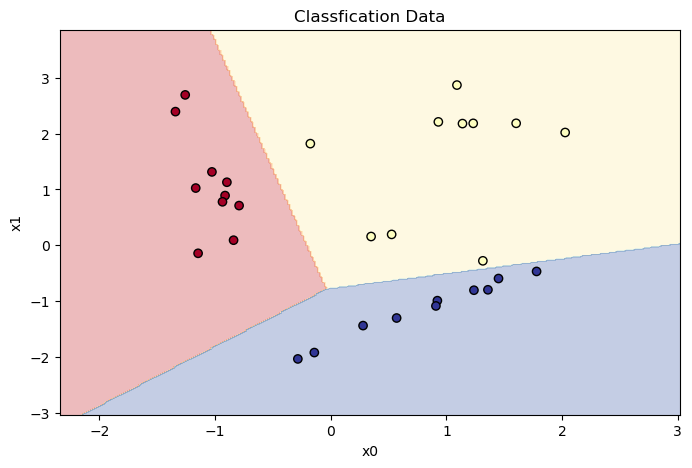

In [67]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z4, alpha=0.3, cmap=plt.cm.RdYlBu)
ax1.scatter(X2[:, 0], X2[:, 1], c=y2, edgecolors='k', cmap=plt.cm.RdYlBu)
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

#### Using OvR 

In [68]:
logisModel5 = OneVsRestClassifier(LogisticRegression(penalty=None, solver='newton-cholesky',max_iter=100000))
logis5 = logisModel5.fit(X2, y2)

In [69]:
logis5.score(X2,y2)

1.0

In [70]:
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
Z5 = logis5.predict(np.c_[xx.ravel(), yy.ravel()])
Z5 = Z5.reshape(xx.shape)

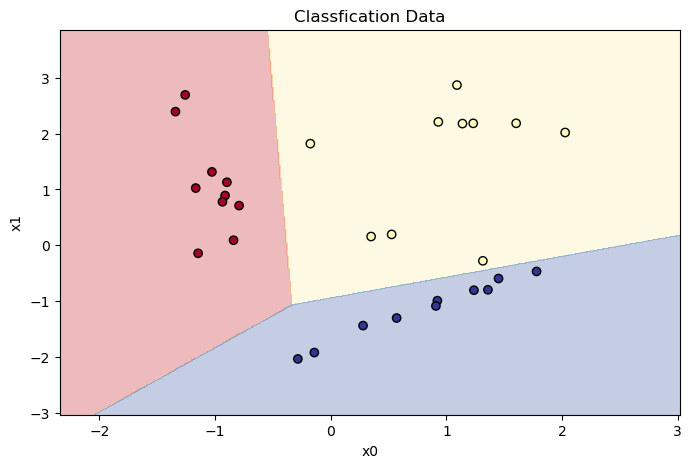

In [71]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z5, alpha=0.3, cmap=plt.cm.RdYlBu)
ax1.scatter(X2[:, 0], X2[:, 1], c=y2, edgecolors='k', cmap=plt.cm.RdYlBu)
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

### Application of SciKit Learn for Example 3

#### Using OvR Logistic Regression

In [72]:
logisModel6 = OneVsRestClassifier(LogisticRegression(penalty=None, solver='lbfgs', max_iter=100000))
logis6 = logisModel6.fit(X3, y3)

In [73]:
logis6.score(X3,y3)

0.86

In [74]:
x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.02)
x2grid = np.arange(y_min, y_max, 0.02)
xx, yy = np.meshgrid(x1grid,x2grid)
Z6 = logis6.predict(np.c_[xx.ravel(), yy.ravel()])
Z6 = Z6.reshape(xx.shape)

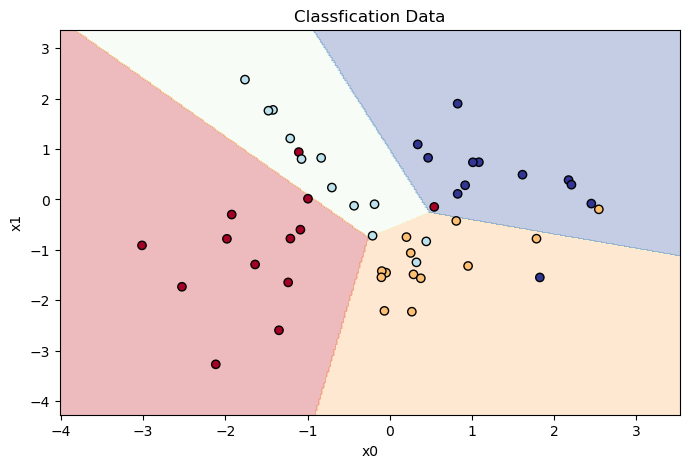

In [75]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z6, alpha=0.3, cmap=plt.cm.RdYlBu)
ax1.scatter(X3[:, 0], X3[:, 1], c=y3, edgecolors='k', cmap=plt.cm.RdYlBu)
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

#### Using Multinomial Logistic Regression

In [76]:
logisModel7 = LogisticRegression(penalty=None, solver='lbfgs', max_iter=100000)
logis7 = logisModel7.fit(X3, y3)

In [77]:
logis7.score(X3,y3)

0.86

In [78]:
x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.02)
x2grid = np.arange(y_min, y_max, 0.02)
xx, yy = np.meshgrid(x1grid,x2grid)
Z7 = logis7.predict(np.c_[xx.ravel(), yy.ravel()])
Z7 = Z7.reshape(xx.shape)

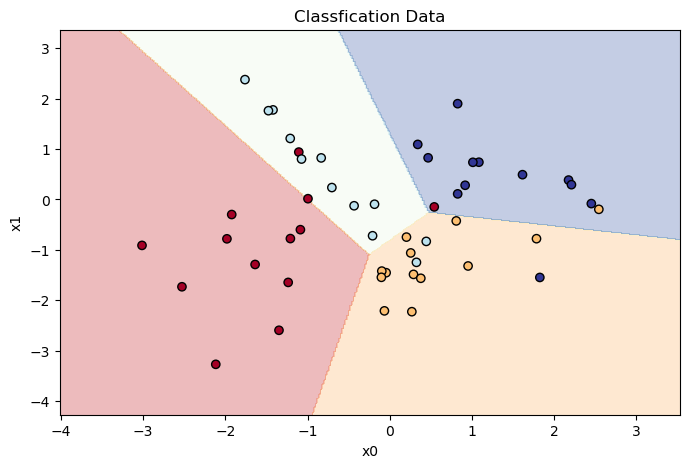

In [79]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z7, alpha=0.3, cmap=plt.cm.RdYlBu)
ax1.scatter(X3[:, 0], X3[:, 1], c=y3, edgecolors='k', cmap=plt.cm.RdYlBu)
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

## Apply Multi-Class Logistic Regression with Polynomial Pipeline

### Underfitting

In [80]:
degree = 1
stepsLogisticsRegression = [
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', OneVsRestClassifier(LogisticRegression(penalty=None, solver='lbfgs', max_iter=10000)))
]

losPipe1 = Pipeline(stepsLogisticsRegression)

losPipe1.fit(X3, y3)

Pipeline(steps=[('poly', PolynomialFeatures(degree=1, include_bias=False)),
                ('scaler', StandardScaler()),
                ('model',
                 OneVsRestClassifier(estimator=LogisticRegression(max_iter=10000,
                                                                  penalty=None)))])

In [81]:
losPipe1.score(X3, y3)

0.86

In [82]:
x_min, x_max = X3[:,0].min() - 1, X3[:,0].max() + 1
y_min, y_max = X3[:,1].min() - 1, X3[:,1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
Z1 = losPipe1.predict(np.c_[xx.ravel(), yy.ravel()])
Z1 = Z1.reshape(xx.shape)

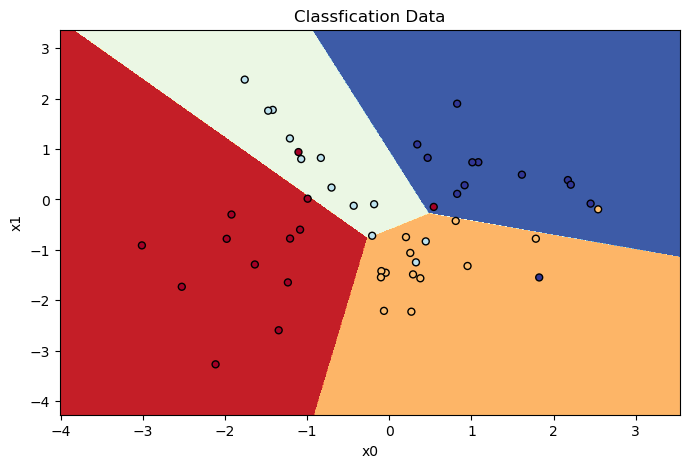

In [83]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z1, cmap=plt.cm.RdYlBu)
plt.scatter(X3[:,0], X3[:,1], marker="o", c=y3, s=25, edgecolor='k', cmap=plt.cm.RdYlBu)
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

### Overfitting

In [84]:
degree = 5
stepsLogisticsRegression = [
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', OneVsRestClassifier(LogisticRegression(penalty=None, solver='lbfgs', max_iter=10000)))
]


losPipe2 = Pipeline(stepsLogisticsRegression)

losPipe2.fit(X3, y3)

Pipeline(steps=[('poly', PolynomialFeatures(degree=5, include_bias=False)),
                ('scaler', StandardScaler()),
                ('model',
                 OneVsRestClassifier(estimator=LogisticRegression(max_iter=10000,
                                                                  penalty=None)))])

In [85]:
losPipe2.score(X3, y3)

1.0

In [86]:
x_min, x_max = X3[:,0].min() - 1, X3[:,0].max() + 1
y_min, y_max = X3[:,1].min() - 1, X3[:,1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
Z2 = losPipe2.predict(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)

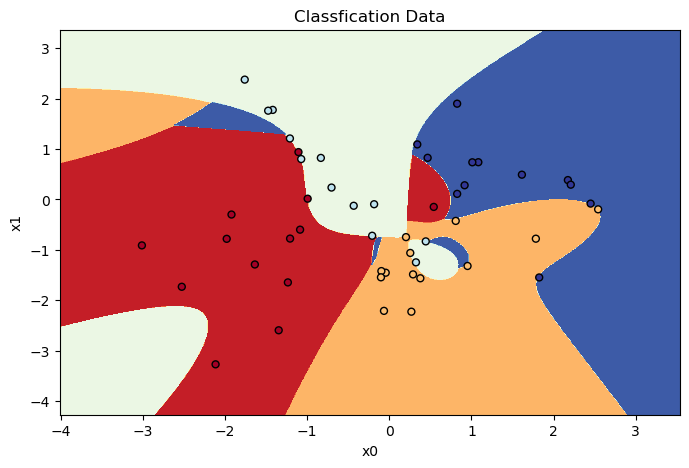

In [87]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z2, cmap=plt.cm.RdYlBu)
plt.scatter(X3[:,0], X3[:,1], marker="o", c=y3, s=25, edgecolor='k', cmap=plt.cm.RdYlBu)
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

### Just Right

In [88]:
degree = 2
stepsLogisticsRegression = [
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', OneVsRestClassifier(LogisticRegression(penalty=None, solver='lbfgs', max_iter=10000)))
]


losPipe3 = Pipeline(stepsLogisticsRegression)

losPipe3.fit(X3, y3)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('model',
                 OneVsRestClassifier(estimator=LogisticRegression(max_iter=10000,
                                                                  penalty=None)))])

In [89]:
losPipe3.score(X3, y3)

0.9

In [90]:
x_min, x_max = X3[:,0].min() - 1, X3[:,0].max() + 1
y_min, y_max = X3[:,1].min() - 1, X3[:,1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
Z3 = losPipe3.predict(np.c_[xx.ravel(), yy.ravel()])
Z3 = Z3.reshape(xx.shape)

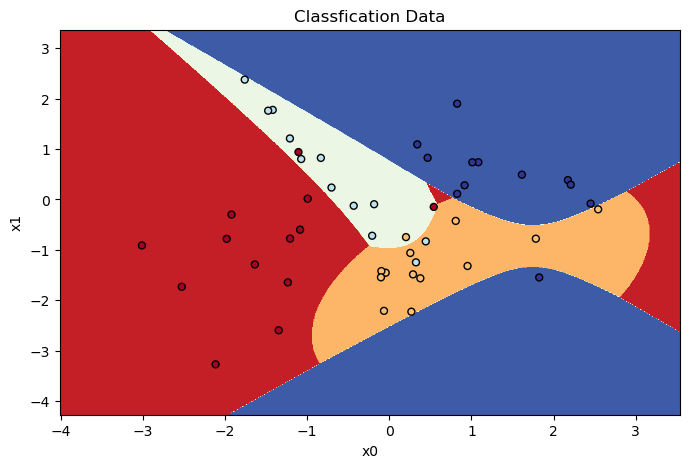

In [91]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z3, cmap=plt.cm.RdYlBu)
plt.scatter(X3[:,0], X3[:,1], marker="o", c=y3, s=25, edgecolor='k', cmap=plt.cm.RdYlBu)
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

### Address Overfitting

In [92]:
degree = 5
stepsLogisticsRegression = [
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', OneVsRestClassifier(LogisticRegression(C=10, solver='lbfgs', max_iter=10000)))
]


losPipe4 = Pipeline(stepsLogisticsRegression)

losPipe4.fit(X3, y3)

Pipeline(steps=[('poly', PolynomialFeatures(degree=5, include_bias=False)),
                ('scaler', StandardScaler()),
                ('model',
                 OneVsRestClassifier(estimator=LogisticRegression(C=10,
                                                                  max_iter=10000)))])

In [93]:
losPipe4.score(X3, y3)

0.9

In [94]:
x_min, x_max = X3[:,0].min() - 1, X3[:,0].max() + 1
y_min, y_max = X3[:,1].min() - 1, X3[:,1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
Z4 = losPipe4.predict(np.c_[xx.ravel(), yy.ravel()])
Z4 = Z4.reshape(xx.shape)

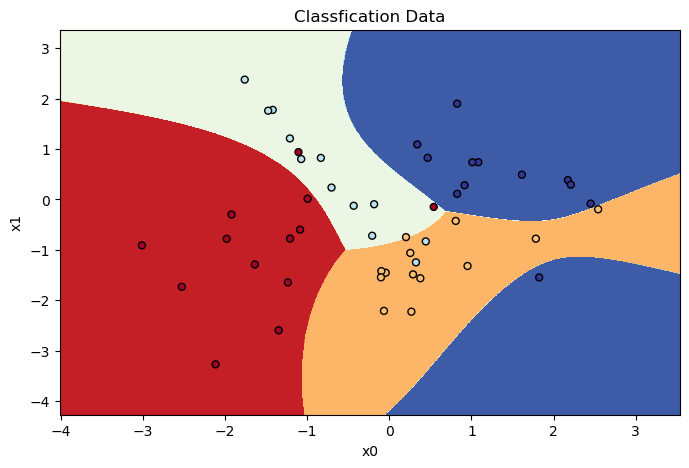

In [95]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z4, cmap=plt.cm.RdYlBu)
plt.scatter(X3[:,0], X3[:,1], marker="o", c=y3, s=25, edgecolor='k', cmap=plt.cm.RdYlBu)
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

## Implementation of OvR Manually

The procedure of implementing OvR (One-vs-All) in Logistic Regression is as follows:

1. Re-compute y where y is classification 0, if y is classification 0, set it to 1 and the rest set it to 0. `np.where(y == 0, 1, 0)`
2. Perform the same for all other classification.
3. Perform gradient descent for each classification and keep the coefficient and the intercept.
4. Perform prediction for each classification and keep the probability instead of the True or False result.
5. You can stack each classification probability by rows or columns.
6. Then we use `argmax()` to get the rows or columns that has the highest probability.

**Important Note**
- When stacking the probability, classification 0 must be the first column or first row and following according to classification number.
- For very large classification, it is recommend to use Pandas DataFrame instead.

### Manual Implementation of OvR Step by Step

In [96]:
X1

array([[1. , 3. ],
       [2. , 4. ],
       [8. , 9. ],
       [3. , 4. ],
       [7. , 8.5],
       [6.8, 7.5],
       [2. , 5. ],
       [1.5, 2.5],
       [6. , 3. ],
       [7. , 4. ],
       [6. , 5. ],
       [6. , 8. ],
       [8. , 3. ],
       [5. , 4. ],
       [9. , 8. ]])

In [97]:
y1

array([0, 0, 1, 0, 1, 1, 0, 0, 2, 2, 2, 1, 2, 2, 1])

In [98]:
y_classification_0 = np.where(y1==0,1,0)
y_classification_0 

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [99]:
X1.shape

(15, 2)

In [100]:
iterations = 10000
alpha = 0.01
lambdaRegu = 0
initial_b = 0.

In [101]:
coef1_classification_0, intercept1_classification_0, _, _, _ = my.compute_gradient_descent(X1, y_classification_0, 
                                                                                           gradient_function=my.compute_logistic_gradient, 
                                                                                           cost_function = my.compute_logistic_cost, 
                                                                                           init_intercept=initial_b, iterations=iterations, 
                                                                                           alpha=alpha, reguLambda=lambdaRegu)

iteration 9999: cost = 4.9573e-02: intercept = 3.0289e+00: weights = [-2.81041722  1.52373494]
best w [-2.8104  1.5237]
best b 3.0289


In [102]:
y_classification_1 = np.where(y1==1,1,0)
y_classification_1

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [103]:
coef1_classification_1, intercept1_classification_1, _, _, _ = my.compute_gradient_descent(X1, y_classification_1, 
                                                                                           gradient_function=my.compute_logistic_gradient, 
                                                                                           cost_function = my.compute_logistic_cost, 
                                                                                           init_intercept=initial_b, iterations=iterations, 
                                                                                           alpha=alpha, reguLambda=lambdaRegu)

iteration 9999: cost = 1.1068e-01: intercept = -6.4557e+00: weights = [-0.03594626  1.08931414]
best w [-0.0359  1.0893]
best b -6.4557


In [104]:
y_classification_2 = np.where(y1==2,1,0)
y_classification_2

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0])

In [105]:
coef1_classification_2, intercept1_classification_2, _, _, _ = my.compute_gradient_descent(X1, y_classification_2, 
                                                                                           gradient_function=my.compute_logistic_gradient, 
                                                                                           cost_function = my.compute_logistic_cost, 
                                                                                           init_intercept=initial_b, iterations=iterations, 
                                                                                           alpha=alpha, reguLambda=lambdaRegu)

iteration 9999: cost = 6.6933e-02: intercept = 1.0370e+00: weights = [ 2.65909907 -3.23693611]
best w [ 2.6591 -3.2369]
best b 1.037


In [106]:
y_predict_classification_0 = my.predict_logistic(X1, coef1_classification_0, intercept1_classification_0, prob=True)
y_predict_classification_0

array([[9.91753290e-01],
       [9.70772377e-01],
       [3.20175002e-03],
       [6.66536292e-01],
       [2.43089570e-02],
       [9.43403471e-03],
       [9.93482417e-01],
       [9.32300978e-01],
       [9.49157428e-05],
       [2.62161597e-05],
       [1.99531473e-03],
       [1.61955262e-01],
       [3.43781056e-07],
       [7.18696144e-03],
       [4.21175881e-05]])

In [107]:
y_predict_all = np.array(y_predict_classification_0)

In [108]:
y_predict_classification_1 = my.predict_logistic(X1, coef1_classification_1, intercept1_classification_1, prob=True)
y_predict_classification_1

array([[0.03828247],
       [0.10244386],
       [0.95523507],
       [0.09918554],
       [0.92769579],
       [0.81301127],
       [0.253308  ],
       [0.02217514],
       [0.03218751],
       [0.08705845],
       [0.22708728],
       [0.88524964],
       [0.03002172],
       [0.09294463],
       [0.8738318 ]])

In [109]:
y_predict_all = np.hstack((y_predict_all, y_predict_classification_1))

In [110]:
y_predict_all.shape

(15, 2)

In [111]:
y_predict_classification_2 = my.predict_logistic(X1, coef1_classification_2, intercept1_classification_2, prob=True)
y_predict_classification_2

array([[2.43655889e-03],
       [1.36864290e-03],
       [1.08764509e-03],
       [1.91998366e-02],
       [3.84461193e-04],
       [5.71933565e-03],
       [5.38366563e-05],
       [4.45014529e-02],
       [9.99311816e-01],
       [9.98774193e-01],
       [6.91447270e-01],
       [1.35837664e-04],
       [9.99996625e-01],
       [7.99749774e-01],
       [2.83611561e-01]])

In [112]:
y_predict_all = np.hstack((y_predict_all, y_predict_classification_2))

In [113]:
y_predict_all

array([[9.91753290e-01, 3.82824713e-02, 2.43655889e-03],
       [9.70772377e-01, 1.02443856e-01, 1.36864290e-03],
       [3.20175002e-03, 9.55235066e-01, 1.08764509e-03],
       [6.66536292e-01, 9.91855429e-02, 1.91998366e-02],
       [2.43089570e-02, 9.27695792e-01, 3.84461193e-04],
       [9.43403471e-03, 8.13011274e-01, 5.71933565e-03],
       [9.93482417e-01, 2.53308001e-01, 5.38366563e-05],
       [9.32300978e-01, 2.21751374e-02, 4.45014529e-02],
       [9.49157428e-05, 3.21875071e-02, 9.99311816e-01],
       [2.62161597e-05, 8.70584532e-02, 9.98774193e-01],
       [1.99531473e-03, 2.27087282e-01, 6.91447270e-01],
       [1.61955262e-01, 8.85249643e-01, 1.35837664e-04],
       [3.43781056e-07, 3.00217221e-02, 9.99996625e-01],
       [7.18696144e-03, 9.29446295e-02, 7.99749774e-01],
       [4.21175881e-05, 8.73831797e-01, 2.83611561e-01]])

In [114]:
ypredict = np.argmax(y_predict_all,axis =1)
ypredict

array([0, 0, 1, 0, 1, 1, 0, 0, 2, 2, 2, 1, 2, 2, 1])

In [115]:
y1

array([0, 0, 1, 0, 1, 1, 0, 0, 2, 2, 2, 1, 2, 2, 1])

In [116]:
print('Train Accuracy: %f'%(np.mean(ypredict.reshape(-1,1) == y1.reshape(-1,1)) * 100))

Train Accuracy: 100.000000


In [117]:
ypredict_prob = np.max(y_predict_all,axis =1)
ypredict_prob

array([0.99175329, 0.97077238, 0.95523507, 0.66653629, 0.92769579,
       0.81301127, 0.99348242, 0.93230098, 0.99931182, 0.99877419,
       0.69144727, 0.88524964, 0.99999662, 0.79974977, 0.8738318 ])

If we have very large classification we can use Pandas Dataframe to give us the classification name. Take this example, we can assume that 0 is Class A, 1 is Class B and 2 is Class C.

The following shows us how to use Pandas to provide us the proper classification.

In [118]:
y_predict_all_df = pd.DataFrame(y_predict_all, columns=['class 0', 'class 1', 'class 2'])
y_predict_all_df

,class 0,class 1,class 2
0,9.917533e-01,0.038282,0.002437
1,9.707724e-01,0.102444,0.001369
2,3.201750e-03,0.955235,0.001088
3,6.665363e-01,0.099186,0.019200
4,2.430896e-02,0.927696,0.000384
5,9.434035e-03,0.813011,0.005719
6,9.934824e-01,0.253308,0.000054
7,9.323010e-01,0.022175,0.044501
8,9.491574e-05,0.032188,0.999312
9,2.621616e-05,0.087058,0.998774


In [119]:
y_predict_df = y_predict_all_df.idxmax(axis=1)
y_predict_df

0     class 0
1     class 0
2     class 1
3     class 0
4     class 1
5     class 1
6     class 0
7     class 0
8     class 2
9     class 2
10    class 2
11    class 1
12    class 2
13    class 2
14    class 1
dtype: object

In [120]:
y1

array([0, 0, 1, 0, 1, 1, 0, 0, 2, 2, 2, 1, 2, 2, 1])

### Implement OvR with Function

In [121]:
def ovrLogisticRegression(X, y, gradient_function = my.compute_logistic_gradient, cost_function = my.compute_logistic_cost, init_coefficient = None, 
                             init_intercept=0., iterations=10000, alpha=0.01, reguLambda = 0., 
                             printProgress=False, printProgressRate = 1000, storeHistory=False ):

    m,n = X.shape
    number_class = np.unique(y)   
    GD_result = {}
    
    for c in number_class:
        y_class = np.where(y == c,1,0)
        print('Classifying Class:',c)
        coef, intercept, _, _, _ = my.compute_gradient_descent(X, y_class, gradient_function = gradient_function, cost_function = cost_function, 
                                                               init_coefficient = init_coefficient, init_intercept = init_intercept, 
                                                               iterations = iterations, alpha = alpha, reguLambda = reguLambda, 
                                                               printProgress = printProgress, printProgressRate = printProgressRate, 
                                                               storeHistory = storeHistory) 
        GD_result[c] = {'coef':coef, 'intercept':intercept}

    result = GD_result
    return result

In [122]:
GD_result = ovrLogisticRegression(X1, y1)

Classifying Class: 0
iteration 9999: cost = 4.9573e-02: intercept = 3.0289e+00: weights = [-2.81041722  1.52373494]
best w [-2.8104  1.5237]
best b 3.0289
Classifying Class: 1
iteration 9999: cost = 1.1068e-01: intercept = -6.4557e+00: weights = [-0.03594626  1.08931414]
best w [-0.0359  1.0893]
best b -6.4557
Classifying Class: 2
iteration 9999: cost = 6.6933e-02: intercept = 1.0370e+00: weights = [ 2.65909907 -3.23693611]
best w [ 2.6591 -3.2369]
best b 1.037


In [123]:
GD_result

{0: {'coef': array([[-2.81041722],
         [ 1.52373494]]),
  'intercept': 3.028872451997885},
 1: {'coef': array([[-0.03594626],
         [ 1.08931414]]),
  'intercept': -6.455724808031753},
 2: {'coef': array([[ 2.65909907],
         [-3.23693611]]),
  'intercept': 1.0369802607309073}}

In [124]:
def ovrMultiClassPredict(X, GD_result, prob=True):

    number_class = GD_result.keys()
    first = True

    for c in number_class: 
        #print(c)
        proba = my.predict_logistic(X, GD_result[c]['coef'], GD_result[c]['intercept'], prob=prob)
        if first:
            y_predict_all = np.array(proba)
            first = False
            #print('shape',y_predict_all.shape)
        else:
            #print(c)
            y_predict_all = np.hstack((y_predict_all, proba))
            #print(y_predict_all.shape)

    #print('shape_all',y_predict_all.shape)
    y_predict = np.argmax(y_predict_all, axis = 1)
    #print('yredit',y_predict.shape)
    y_proba = np.max(y_predict_all, axis = 1)

    return y_predict, y_proba

In [125]:
y_predict, y_proba = ovrMultiClassPredict(X1, GD_result)
y_predict

array([0, 0, 1, 0, 1, 1, 0, 0, 2, 2, 2, 1, 2, 2, 1])

In [126]:
y1

array([0, 0, 1, 0, 1, 1, 0, 0, 2, 2, 2, 1, 2, 2, 1])

In [127]:
y_proba

array([0.99175329, 0.97077238, 0.95523507, 0.66653629, 0.92769579,
       0.81301127, 0.99348242, 0.93230098, 0.99931182, 0.99877419,
       0.69144727, 0.88524964, 0.99999662, 0.79974977, 0.8738318 ])

### Application of OvR with Example 1

In [128]:
logisModel11 = LogisticRegression(penalty=None, solver='lbfgs', multi_class='ovr')
logis11 = logisModel11.fit(X1, y1)

In [129]:
y_hat11 = logis11.predict(X1)
y_hat11

array([0, 0, 1, 0, 1, 1, 0, 0, 2, 2, 2, 1, 2, 2, 1])

In [130]:
logis1.score(X1,y1)

1.0

In [131]:
GD_result11 = ovrLogisticRegression(X1, y1)

Classifying Class: 0
iteration 9999: cost = 4.9573e-02: intercept = 3.0289e+00: weights = [-2.81041722  1.52373494]
best w [-2.8104  1.5237]
best b 3.0289
Classifying Class: 1
iteration 9999: cost = 1.1068e-01: intercept = -6.4557e+00: weights = [-0.03594626  1.08931414]
best w [-0.0359  1.0893]
best b -6.4557
Classifying Class: 2
iteration 9999: cost = 6.6933e-02: intercept = 1.0370e+00: weights = [ 2.65909907 -3.23693611]
best w [ 2.6591 -3.2369]
best b 1.037


In [132]:
y_predict11, y_proba11 = ovrMultiClassPredict(X1, GD_result11)
y_predict11

array([0, 0, 1, 0, 1, 1, 0, 0, 2, 2, 2, 1, 2, 2, 1])

In [133]:
print('Train Accuracy: %f'%(np.mean(y_predict11.reshape(-1,1) == y1.reshape(-1,1)) * 100))
print('Compare Prediction with SciKit Learn: %f'%(np.mean(y_predict11.reshape(-1,1) == y_hat11.reshape(-1,1)) * 100))

Train Accuracy: 100.000000
Compare Prediction with SciKit Learn: 100.000000


In [134]:
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
#print(xx.shape)
#print(yy.shape)
#print(np.c_[xx.ravel(), yy.ravel()].shape)
ZG11, _ = ovrMultiClassPredict(np.c_[xx.ravel(), yy.ravel()], GD_result11)
#print(ZG11.shape)
#print(ZG11[:5])
#print(Z4[-10:])
ZG11 = ZG11.reshape(xx.shape)
#print(ZG11.shape)

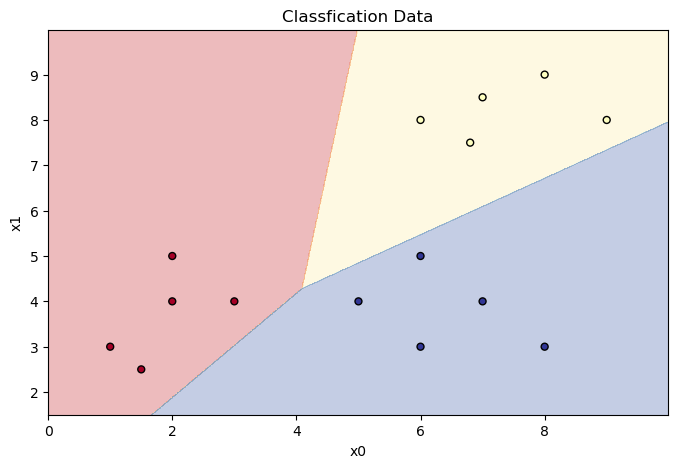

In [135]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, ZG11, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X1[:,0], X1[:,1], marker="o", c=y1, s=25, edgecolor='k', cmap=plt.cm.RdYlBu)
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

### Application of OvR with Example 2

In [136]:
logisModel12 = OneVsRestClassifier(LogisticRegression(penalty=None, solver='newton-cg',max_iter=100000))
logis12 = logisModel12.fit(X2, y2)

In [137]:
logis12.score(X2, y2)

1.0

In [138]:
y_hat12 = logis12.predict(X2)
y_hat12

array([2, 1, 2, 1, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 2, 1, 1, 0,
       1, 2, 2, 2, 0, 1, 0, 2])

In [139]:
GD_result12 = ovrLogisticRegression(X2, y2, iterations=50000)
y_predict12, y_proba12 = ovrMultiClassPredict(X2, GD_result12)

Classifying Class: 0
iteration 49999: cost = 1.8835e-02: intercept = -3.6184e+00: weights = [-7.45365068  0.48793454]
best w [-7.4537  0.4879]
best b -3.6184
Classifying Class: 1
iteration 49999: cost = 2.5828e-01: intercept = -2.8816e+00: weights = [2.55699387 2.13615795]
best w [2.557  2.1362]
best b -2.8816
Classifying Class: 2
iteration 49999: cost = 3.5136e-02: intercept = -3.8337e+00: weights = [ 1.37195718 -6.48136216]
best w [ 1.372  -6.4814]
best b -3.8337


In [140]:
print('Train Accuracy: %f'%(np.mean(y_predict12.reshape(-1,1) == y2.reshape(-1,1)) * 100))
print('Compare Prediction with SciKit Learn: %f'%(np.mean(y_predict12.reshape(-1,1) == y_hat12.reshape(-1,1)) * 100))

Train Accuracy: 100.000000
Compare Prediction with SciKit Learn: 100.000000


In [141]:
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
#print(xx.shape)
#print(yy.shape)
#print(np.c_[xx.ravel(), yy.ravel()].shape)
ZG12, _ = ovrMultiClassPredict(np.c_[xx.ravel(), yy.ravel()], GD_result12)
#print(ZG11.shape)
#print(ZG11[:5])
#print(Z4[-10:])
ZG12 = ZG12.reshape(xx.shape)
#print(ZG11.shape)

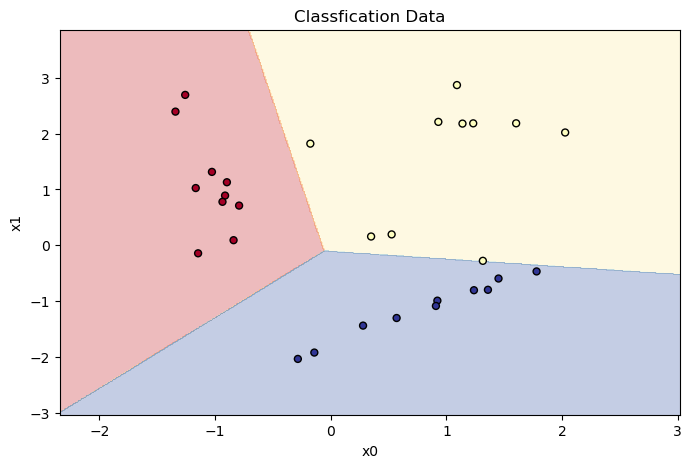

In [142]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, ZG12, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X2[:,0], X2[:,1], marker="o", c=y2, s=25, edgecolor='k', cmap=plt.cm.RdYlBu)
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

### Application of OvR with Example 3 (1 Degree)

In [143]:
logisModel13 = OneVsRestClassifier(LogisticRegression(penalty=None, solver='lbfgs',max_iter=30000))
logis13 = logisModel13.fit(X3, y3)

In [144]:
logis13.score(X3, y3)

0.86

In [145]:
y_hat13 = logis13.predict(X3)

In [146]:
GD_result13 = ovrLogisticRegression(X3, y3, iterations=20000)
y_predict13, y_proba13 = ovrMultiClassPredict(X3, GD_result13)

Classifying Class: 0
iteration 19999: cost = 2.3959e-01: intercept = -3.2501e+00: weights = [-2.82946634 -1.08344007]
best w [-2.8295 -1.0834]
best b -3.2501
Classifying Class: 1
iteration 19999: cost = 3.4575e-01: intercept = -2.8562e+00: weights = [ 1.29322877 -1.92522193]
best w [ 1.2932 -1.9252]
best b -2.8562
Classifying Class: 2
iteration 19999: cost = 4.2341e-01: intercept = -1.2227e+00: weights = [-0.59993849  0.94649863]
best w [-0.5999  0.9465]
best b -1.2227
Classifying Class: 3
iteration 19999: cost = 1.9547e-01: intercept = -2.3447e+00: weights = [2.42790471 2.08712202]
best w [2.4279 2.0871]
best b -2.3447


In [147]:
print('Train Accuracy: %f'%(np.mean(y_predict13.reshape(-1,1) == y3.reshape(-1,1)) * 100))
print('Compare Prediction with SciKit Learn: %f'%(np.mean(y_predict13.reshape(-1,1) == y_hat13.reshape(-1,1)) * 100))

Train Accuracy: 86.000000
Compare Prediction with SciKit Learn: 100.000000


In [148]:
GD_result13

{0: {'coef': array([[-2.82946634],
         [-1.08344007]]),
  'intercept': -3.2500507718956992},
 1: {'coef': array([[ 1.29322877],
         [-1.92522193]]),
  'intercept': -2.8562045716565425},
 2: {'coef': array([[-0.59993849],
         [ 0.94649863]]),
  'intercept': -1.2227442389825458},
 3: {'coef': array([[2.42790471],
         [2.08712202]]),
  'intercept': -2.3446515256166087}}

In [149]:
x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
#print(xx.shape)
#print(yy.shape)
#print(np.c_[xx.ravel(), yy.ravel()].shape)
ZG13, _ = ovrMultiClassPredict(np.c_[xx.ravel(), yy.ravel()], GD_result13)
#print(ZG11.shape)
#print(ZG11[:5])
#print(Z4[-10:])
ZG13 = ZG13.reshape(xx.shape)
#print(ZG11.shape)

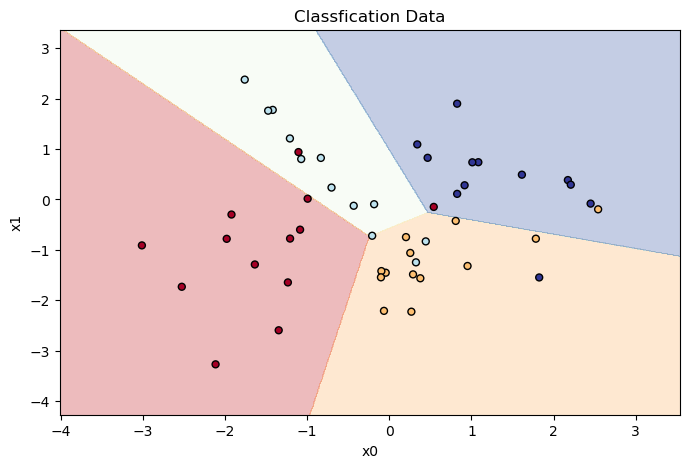

In [150]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, ZG13, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X3[:,0], X3[:,1], marker="o", c=y3, s=25, edgecolor='k', cmap=plt.cm.RdYlBu)
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

### Application of OvR with Example 3 (3 Degree with Regularization)

In [151]:
degree = 5
stepsLogisticsRegression = [
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', OneVsRestClassifier(LogisticRegression(C=10, solver='lbfgs',max_iter=10000)))
]

losPipe14 = Pipeline(stepsLogisticsRegression)

losPipe14.fit(X3, y3)

Pipeline(steps=[('poly', PolynomialFeatures(degree=5, include_bias=False)),
                ('scaler', StandardScaler()),
                ('model',
                 OneVsRestClassifier(estimator=LogisticRegression(C=10,
                                                                  max_iter=10000)))])

In [152]:
losPipe14.score(X3, y3)

0.9

In [153]:
y_hat14 = losPipe14.predict(X3)

In [154]:
x_min, x_max = X3[:,0].min() - 1, X3[:,0].max() + 1
y_min, y_max = X3[:,1].min() - 1, X3[:,1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
Z14 = losPipe14.predict(np.c_[xx.ravel(), yy.ravel()])
Z14 = Z14.reshape(xx.shape)

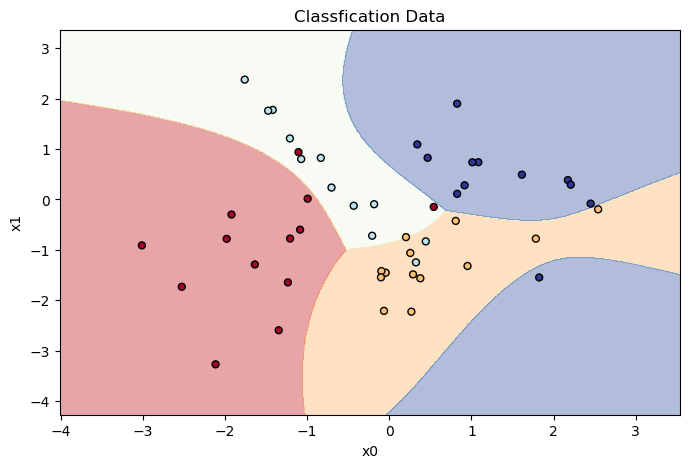

In [155]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z14, alpha=0.4, cmap=plt.cm.RdYlBu)
plt.scatter(X3[:,0], X3[:,1], marker="o", c=y3, s=25, edgecolor='k', cmap=plt.cm.RdYlBu)
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

In [156]:
degree = 5
polynomial_features14 = PolynomialFeatures(degree=degree, include_bias=False)
X3_poly14 = polynomial_features14.fit_transform(X3)
std_scaler14 = StandardScaler()
X3_norm14 = std_scaler14.fit_transform(X3_poly14)

In [157]:
GD_result14 = ovrLogisticRegression(X3_norm14, y3, alpha = 0.1, iterations=20000, reguLambda=0.1)

y_predict14, y_proba14 = ovrMultiClassPredict(X3_norm14, GD_result14)

Classifying Class: 0
iteration 19999: cost = 1.6293e-01: intercept = -5.3498e-01: weights = [-1.82364234 -0.3636045   1.84349637  1.00391412 -2.02544789 -1.86398908
 -1.27944057 -0.89115878 -0.02722787 -0.10782925  0.51495954  0.10530975
  0.64718645 -0.36291531 -0.63409736 -0.40033453 -0.23383547 -0.42391708
 -0.11427144 -0.19403518]
best w [-1.8236 -0.3636  1.8435  1.0039 -2.0254 -1.864  -1.2794 -0.8912 -0.0272
 -0.1078  0.515   0.1053  0.6472 -0.3629 -0.6341 -0.4003 -0.2338 -0.4239
 -0.1143 -0.194 ]
best b -0.535
Classifying Class: 1
iteration 19999: cost = 2.0527e-01: intercept = -3.5681e+00: weights = [ 1.77546614 -3.26832899 -1.13260144 -1.33783824  0.33179166  0.36334591
  0.56595584 -1.09262702 -0.13051714 -0.03814697 -0.75757666 -2.77068701
  0.61662222 -0.15991727  0.55096309 -0.20594095 -1.22115107  1.71100948
 -0.13803369  0.16764869]
best w [ 1.7755 -3.2683 -1.1326 -1.3378  0.3318  0.3633  0.566  -1.0926 -0.1305
 -0.0381 -0.7576 -2.7707  0.6166 -0.1599  0.551  -0.2059 -1.2

In [158]:
print('Train Accuracy: %f'%(np.mean(y_predict14.reshape(-1,1) == y3.reshape(-1,1)) * 100))
print('Compare Prediction with SciKit Learn: %f'%(np.mean(y_predict14.reshape(-1,1) == y_hat14.reshape(-1,1)) * 100))

Train Accuracy: 90.000000
Compare Prediction with SciKit Learn: 100.000000


In [159]:
x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
zz = np.c_[xx.ravel(), yy.ravel()]
zz_poly = polynomial_features14.transform(zz)
zz_norm = std_scaler14.transform(zz_poly)
ZG14, _ = ovrMultiClassPredict(zz_norm, GD_result14)
ZG14 = ZG14.reshape(xx.shape)

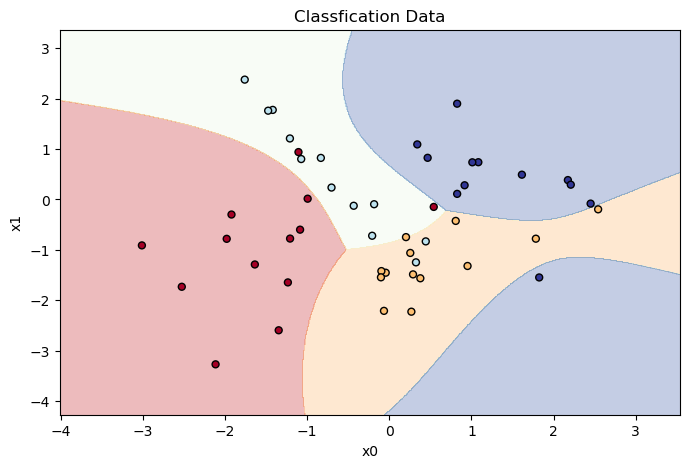

In [160]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, ZG14, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X3[:,0], X3[:,1], marker="o", c=y3, s=25, edgecolor='k', cmap=plt.cm.RdYlBu)
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

### Application of OvR on Example 4 to Show Underfitting & Overfitting

In [161]:
X4, y4 = make_classification(n_samples=50, n_features = 2, n_informative = 2, n_redundant=0, n_repeated=0, 
                             n_classes=4, n_clusters_per_class = 1, random_state=3388)

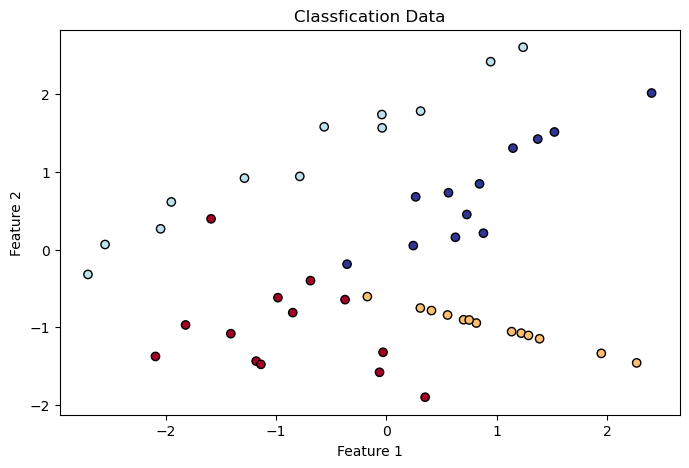

In [162]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X4[:, 0], X4[:, 1], c=y4, edgecolors='k', cmap=plt.cm.RdYlBu)
ax1.set_title('Classfication Data')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
plt.show()

### Underfitting

In [163]:
degree = 1
polynomial_features15 = PolynomialFeatures(degree=degree, include_bias=False)
X4_poly15 = polynomial_features15.fit_transform(X4)
std_scaler15 = StandardScaler()
X4_norm15 = std_scaler15.fit_transform(X4_poly15)

In [164]:
GD_result15 = ovrLogisticRegression(X4_norm15, y4, alpha = 0.1, iterations=10000, reguLambda=0)
y_predict15, y_proba15 = ovrMultiClassPredict(X4_norm15, GD_result15)

Classifying Class: 0
iteration 9999: cost = 2.4688e-01: intercept = -3.5465e+00: weights = [-2.13357204 -4.17498214]
best w [-2.1336 -4.175 ]
best b -3.5465
Classifying Class: 1
iteration 9999: cost = 2.2131e-01: intercept = -2.8784e+00: weights = [ 3.38199006 -2.77479366]
best w [ 3.382  -2.7748]
best b -2.8784
Classifying Class: 2
iteration 9999: cost = 5.3185e-02: intercept = -7.0455e+00: weights = [-4.41065808  6.71078552]
best w [-4.4107  6.7108]
best b -7.0455
Classifying Class: 3
iteration 9999: cost = 4.1003e-01: intercept = -1.6292e+00: weights = [1.16631928 0.86661571]
best w [1.1663 0.8666]
best b -1.6292


In [165]:
print('Train Accuracy: %f'%(np.mean(y_predict15.reshape(-1,1) == y4.reshape(-1,1)) * 100))

Train Accuracy: 94.000000


In [166]:
x_min, x_max = X4[:, 0].min() - 1, X4[:, 0].max() + 1
y_min, y_max = X4[:, 1].min() - 1, X4[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
zz = np.c_[xx.ravel(), yy.ravel()]
zz_poly = polynomial_features15.transform(zz)
zz_norm = std_scaler15.transform(zz_poly)
ZG15, _ = ovrMultiClassPredict(zz_norm, GD_result15)
ZG15 = ZG15.reshape(xx.shape)

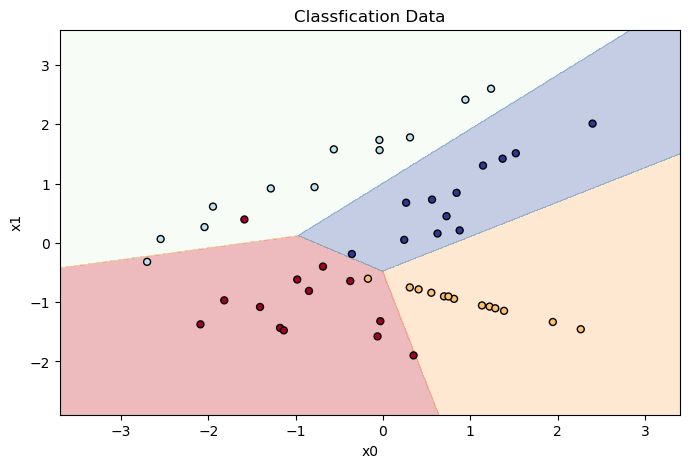

In [167]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, ZG15, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X4[:,0], X4[:,1], marker="o", c=y4, s=25, edgecolor='k', cmap=plt.cm.RdYlBu)
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

### Overfitting

In [168]:
degree = 5
polynomial_features16 = PolynomialFeatures(degree=degree, include_bias=False)
X4_poly16 = polynomial_features16.fit_transform(X4)
std_scaler16 = StandardScaler()
X4_norm16 = std_scaler16.fit_transform(X4_poly16)

In [ ]:
start_time = datetime.now()
print(start_time)
GD_result16 = ovrLogisticRegression(X4_norm16, y4, alpha = 0.1, iterations=50000, reguLambda=0)
end_time = datetime.now()
print(end_time)
print('Duration', end_time-start_time)

2024-10-30 14:18:26.242423
Classifying Class: 0
iteration 49999: cost = 1.3222e-02: intercept = -4.1609e+00: weights = [-13.05654989  -5.26831859   4.15588962   5.67233231   2.81165004
   2.2161965   -1.660241    -0.66740539  -4.04332548  -6.10217821
   1.17237668   0.08536191   2.42832942   1.73263359   7.02956106
  -1.6328228    0.16771127  -1.1713695    0.65256416  -1.11706144]
best w [-13.0565  -5.2683   4.1559   5.6723   2.8117   2.2162  -1.6602  -0.6674
  -4.0433  -6.1022   1.1724   0.0854   2.4283   1.7326   7.0296  -1.6328
   0.1677  -1.1714   0.6526  -1.1171]
best b -4.1609
Classifying Class: 1
iteration 49999: cost = 2.3280e-02: intercept = -5.9697e+00: weights = [  3.29232871 -10.72188522  -2.73405593  -8.12986883  -3.91163082
   0.38794788  -1.46752681   3.95916      7.11027942   1.47821183
  -0.90300478   2.21347591  -0.35767307  -4.68557159  -0.20536164
  -0.56685046   1.48098765   0.06571651   1.24408005   4.58026172]
best w [  3.2923 -10.7219  -2.7341  -8.1299  -3.9116 

In [ ]:
y_predict16, y_proba16 = ovrMultiClassPredict(X4_norm16, GD_result16)

In [ ]:
print('Train Accuracy: %f'%(np.mean(y_predict16.reshape(-1,1) == y4.reshape(-1,1)) * 100))

In [ ]:
x_min, x_max = X4[:, 0].min() - 1, X4[:, 0].max() + 1
y_min, y_max = X4[:, 1].min() - 1, X4[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
zz = np.c_[xx.ravel(), yy.ravel()]
zz_poly = polynomial_features16.transform(zz)
zz_norm = std_scaler16.transform(zz_poly)
ZG16, _ = ovrMultiClassPredict(zz_norm, GD_result16)
ZG16 = ZG16.reshape(xx.shape)

In [ ]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, ZG16, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X4[:,0], X4[:,1], marker="o", c=y4, s=25, edgecolor='k', cmap=plt.cm.RdYlBu)
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

**Note: Gradient descent is not very fast when performing on complex data. Thus we setup a new example on smaller and simpler dataset.**

## End